In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import scipy
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
teeplot_subdir = "adaptive-evolution-rate.ipynb"

In [3]:
def load_and_process(url: str, mutation: str) -> pl.DataFrame:
    df = pl.read_parquet(
        url,
        use_pyarrow=True,
    ).group_by(
        ["Task", "Treatment", "Run ID", "Generation Born"],
    ).first().with_columns(
        pl.col("Task").replace_strict(
            {
                "AND": 2,
                "ANDNOT": 3,
                "NAND": 1,
                "NOR": 4,
                "NOT": 1,
                "OR": 3,
                "ORNOT": 2,
                "XOR": 4,
                "EQUALS": 5,
            },
        ).alias("Components"),
        pl.lit(mutation).alias("Mutation"),
    )

    return df


In [4]:
df1 = load_and_process("https://osf.io/emh23/download", "poisson")


sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


In [5]:
df2 = load_and_process("https://osf.io/gk2ty/download", "per site")


In [6]:
df = pl.concat([df1, df2])


In [7]:
dfz = df.filter(
    pl.col("has task")
).group_by(
    ["Task", "Treatment", "Run ID", "Components", "Mutation"],
).agg(
    pl.col("Generation Born").min(),
)


In [8]:
maxgen = dfz["Generation Born"].max()

records = []
records2 = set()
for row in dfz.iter_rows(named=True):
    records.append(
        pd.DataFrame(
            {
                "Task": row["Task"],
                "Treatment": row["Treatment"],
                "Run ID": row["Run ID"],
                "Generation": np.arange(maxgen),
                "Components": row["Components"],
                "Has Task":  row["Generation Born"] <= np.arange(maxgen),
                "mutation": row["Mutation"],
            },
        ),
    )
    records2.add(
        (row["Run ID"], row["Treatment"], row["Task"], row["Components"], row["Mutation"]),
    )

for v, grp in df.to_pandas().groupby(
    ["Run ID", "Treatment", "Task", "Components", "Mutation"],
    observed=True,
):
    if v not in records2:
        print(v)
        records.append(
            pd.DataFrame(
                {
                    "Task": v[2],
                    "Treatment": v[1],
                    "Run ID": v[0],
                    "Components": v[3],
                    "Generation": np.arange(maxgen),
                    "Has Task":  False,
                    "mutation": v[4],
                },
            ),
        )

dfz_ = pd.concat(records, ignore_index=True)


('run_1770', 'Slip-_Long', 'ANDNOT', np.int64(3), 'poisson')
('run_1770', 'Slip-_Long', 'EQUALS', np.int64(5), 'poisson')
('run_1770', 'Slip-_Long', 'NOR', np.int64(4), 'poisson')
('run_1770', 'Slip-_Long', 'XOR', np.int64(4), 'poisson')
('run_1771', 'Slip-_Long', 'AND', np.int64(2), 'poisson')
('run_1771', 'Slip-_Long', 'ANDNOT', np.int64(3), 'poisson')
('run_1771', 'Slip-_Long', 'EQUALS', np.int64(5), 'poisson')
('run_1771', 'Slip-_Long', 'NOR', np.int64(4), 'poisson')
('run_1771', 'Slip-_Long', 'OR', np.int64(3), 'poisson')
('run_1771', 'Slip-_Long', 'XOR', np.int64(4), 'poisson')
('run_1772', 'Slip-_Long', 'AND', np.int64(2), 'poisson')
('run_1772', 'Slip-_Long', 'ANDNOT', np.int64(3), 'poisson')
('run_1772', 'Slip-_Long', 'EQUALS', np.int64(5), 'poisson')
('run_1772', 'Slip-_Long', 'NOR', np.int64(4), 'poisson')
('run_1772', 'Slip-_Long', 'NOT', np.int64(1), 'poisson')
('run_1772', 'Slip-_Long', 'OR', np.int64(3), 'poisson')
('run_1772', 'Slip-_Long', 'XOR', np.int64(4), 'poisson'

('run_1827', 'Slip-', 'XOR', np.int64(4), 'poisson')
('run_1828', 'Slip-', 'EQUALS', np.int64(5), 'poisson')
('run_1828', 'Slip-', 'NOR', np.int64(4), 'poisson')
('run_1828', 'Slip-', 'XOR', np.int64(4), 'poisson')
('run_1829', 'Slip-', 'EQUALS', np.int64(5), 'poisson')
('run_1829', 'Slip-', 'NOR', np.int64(4), 'poisson')
('run_1829', 'Slip-', 'XOR', np.int64(4), 'poisson')
('run_1831', 'Slip+', 'EQUALS', np.int64(5), 'poisson')
('run_1831', 'Slip+', 'XOR', np.int64(4), 'poisson')


('run_1833', 'Slip+', 'EQUALS', np.int64(5), 'poisson')
('run_1833', 'Slip+', 'NOR', np.int64(4), 'poisson')
('run_1833', 'Slip+', 'XOR', np.int64(4), 'poisson')
('run_1836', 'Slip+', 'EQUALS', np.int64(5), 'poisson')
('run_1836', 'Slip+', 'XOR', np.int64(4), 'poisson')
('run_1839', 'Slip+', 'EQUALS', np.int64(5), 'poisson')
('run_1839', 'Slip+', 'XOR', np.int64(4), 'poisson')
('run_1840', 'Slip+', 'XOR', np.int64(4), 'poisson')
('run_1841', 'Slip+', 'EQUALS', np.int64(5), 'poisson')
('run_1841', 'Slip+', 'NOR', np.int64(4), 'poisson')
('run_1842', 'Slip+', 'EQUALS', np.int64(5), 'poisson')
('run_1842', 'Slip+', 'NOR', np.int64(4), 'poisson')
('run_1842', 'Slip+', 'OR', np.int64(3), 'poisson')
('run_1842', 'Slip+', 'XOR', np.int64(4), 'poisson')
('run_1843', 'Slip+', 'EQUALS', np.int64(5), 'poisson')
('run_1843', 'Slip+', 'XOR', np.int64(4), 'poisson')
('run_1844', 'Slip+', 'EQUALS', np.int64(5), 'poisson')
('run_1844', 'Slip+', 'XOR', np.int64(4), 'poisson')
('run_1845', 'Slip+', 'EQU

teeplots/adaptive-evolution-rate.ipynb/col=task+errorbar=ci+hue=treatment+kind=line+post=plt-xlim-0-600+row=mutation+viz=relplot+x=generation+y=has-task+ext=.pdf


teeplots/adaptive-evolution-rate.ipynb/col=task+errorbar=ci+hue=treatment+kind=line+post=plt-xlim-0-600+row=mutation+viz=relplot+x=generation+y=has-task+ext=.png


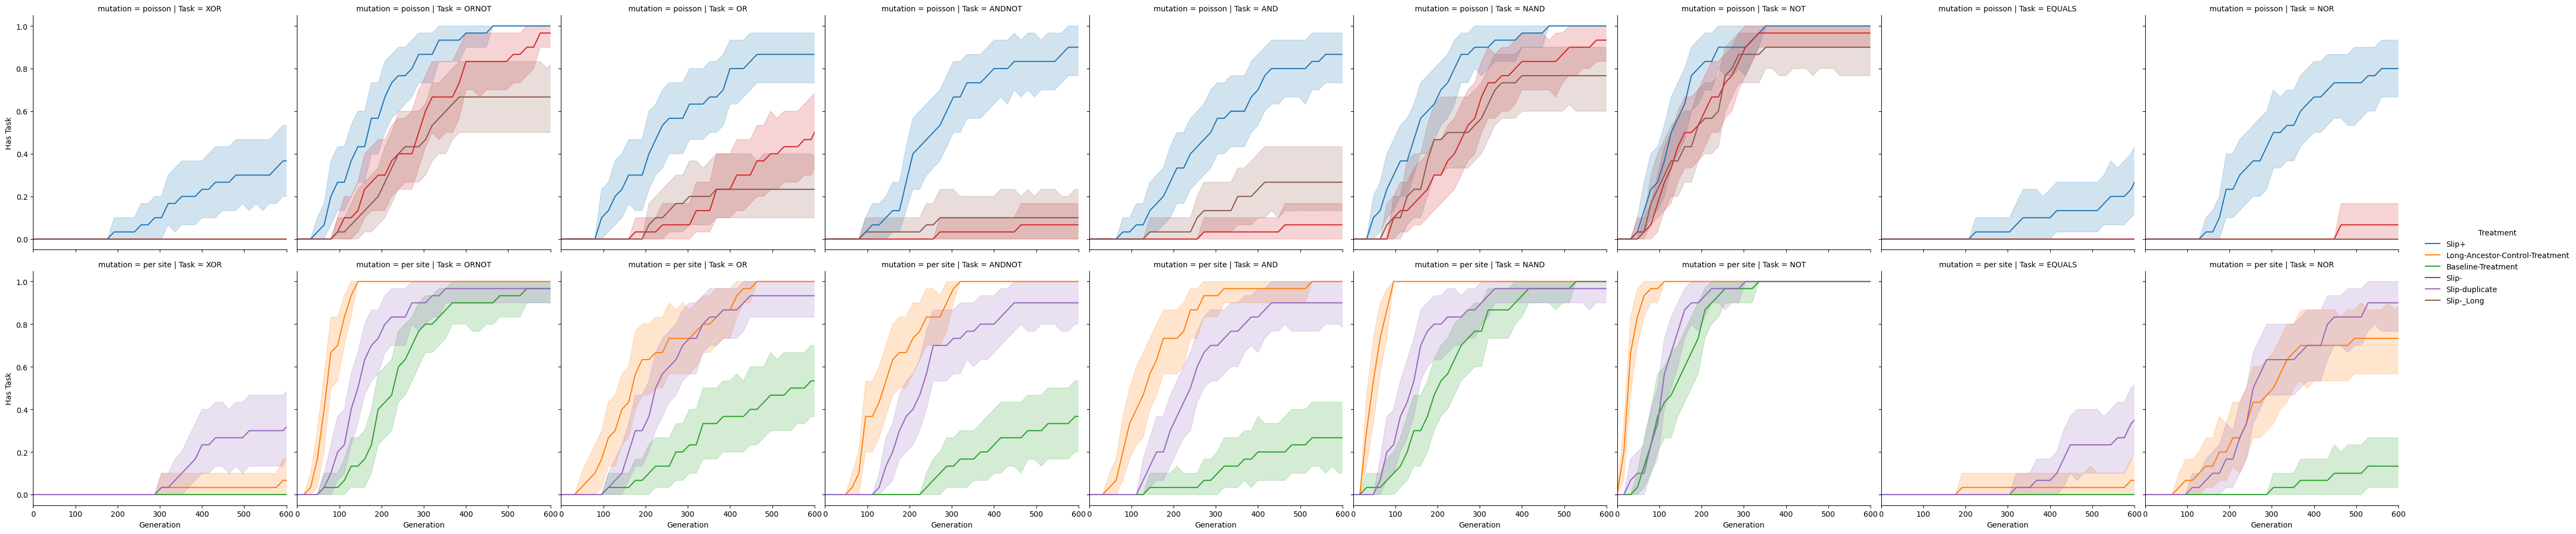

In [9]:
tp.tee(
    sns.relplot,
    data=dfz_[
        dfz_["Generation"] % 16 == 0
    ].reset_index(),
    col="Task",
    row="mutation",
    x="Generation",
    y="Has Task",
    hue="Treatment",
    kind="line",
    errorbar="ci",
    teeplot_postprocess="plt.xlim(0, 600)",
    teeplot_subdir=teeplot_subdir,
)


teeplots/adaptive-evolution-rate.ipynb/col=components+errorbar=ci+hue=treatment+kind=line+post=plt-xlim-0-600+row=mutation+viz=relplot+x=generation+y=has-task+ext=.pdf


teeplots/adaptive-evolution-rate.ipynb/col=components+errorbar=ci+hue=treatment+kind=line+post=plt-xlim-0-600+row=mutation+viz=relplot+x=generation+y=has-task+ext=.png


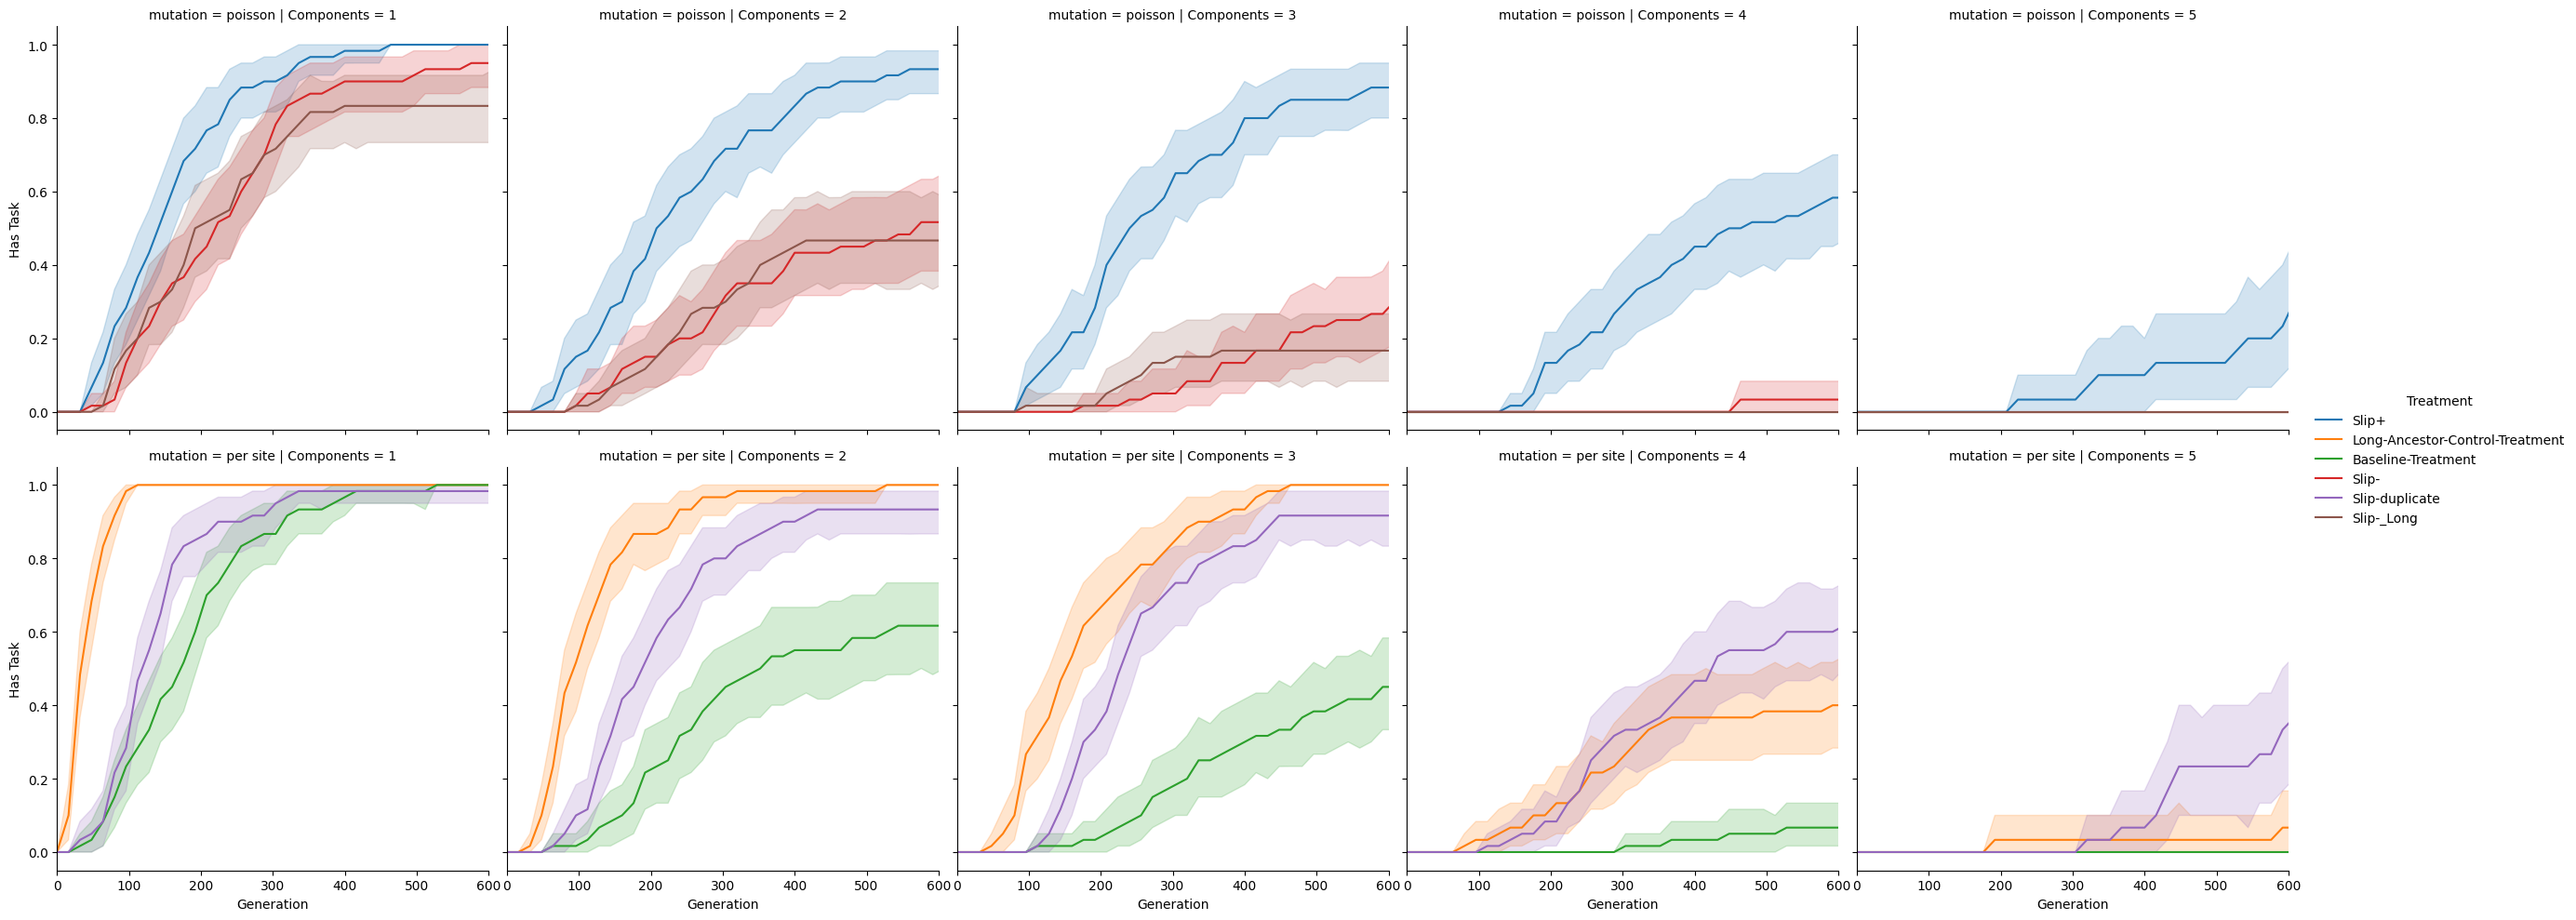

In [10]:
tp.tee(
    sns.relplot,
    data=dfz_[
        dfz_["Generation"] % 16 == 0
    ].reset_index(),
    col="Components",
    row="mutation",
    x="Generation",
    y="Has Task",
    hue="Treatment",
    kind="line",
    errorbar="ci",
    teeplot_postprocess="plt.xlim(0, 600)",
    teeplot_subdir=teeplot_subdir,
)


In [11]:
fil = dfz_[
    (dfz_["Generation"] == 599)
    & dfz_["Treatment"].isin(["Baseline-Treatment", "Slip-duplicate"])
]

for task in fil["Task"].unique():
    tab = [
        [
            (
                (fil["Treatment"] == "Baseline-Treatment")
                & (fil["Task"] == task)
                & fil["Has Task"]
            ).sum(),
            (
                (fil["Treatment"] == "Slip-duplicate")
                & (fil["Task"] == task)
                & fil["Has Task"]
            ).sum(),
        ],
        [
            (
                (fil["Treatment"] == "Baseline-Treatment")
                & (fil["Task"] == task)
                & (~fil["Has Task"])
            ).sum(),
            (
                (fil["Treatment"] == "Slip-duplicate")
                & (fil["Task"] == task)
                & (~fil["Has Task"])
            ).sum(),
        ],
    ]
    print(task, tab)
    print("    ", scipy.stats.fisher_exact(tab))


ANDNOT [[np.int64(11), np.int64(27)], [np.int64(19), np.int64(3)]]
     SignificanceResult(statistic=np.float64(0.06432748538011696), pvalue=np.float64(3.324669067805032e-05))
AND [[np.int64(8), np.int64(27)], [np.int64(22), np.int64(3)]]
     SignificanceResult(statistic=np.float64(0.04040404040404041), pvalue=np.float64(9.502531508333732e-07))
NOT [[np.int64(30), np.int64(30)], [np.int64(0), np.int64(0)]]
     SignificanceResult(statistic=nan, pvalue=1.0)
EQUALS [[np.int64(0), np.int64(10)], [np.int64(30), np.int64(20)]]
     SignificanceResult(statistic=np.float64(0.0), pvalue=np.float64(0.0007970131314101389))
OR [[np.int64(16), np.int64(28)], [np.int64(14), np.int64(2)]]
     SignificanceResult(statistic=np.float64(0.08163265306122448), pvalue=np.float64(0.0009098128565499235))
ORNOT [[np.int64(29), np.int64(29)], [np.int64(1), np.int64(1)]]
     SignificanceResult(statistic=np.float64(1.0), pvalue=1.0)
NAND [[np.int64(30), np.int64(29)], [np.int64(0), np.int64(1)]]
     Significa

In [12]:
fil = dfz_[
    (dfz_["Generation"] == 599)
    & dfz_["Treatment"].isin(["Long-Ancestor-Control-Treatment", "Slip-duplicate"])
]

for task in fil["Task"].unique():
    tab = [
        [
            (
                (fil["Treatment"] == "Long-Ancestor-Control-Treatment")
                & (fil["Task"] == task)
                & fil["Has Task"]
            ).sum(),
            (
                (fil["Treatment"] == "Slip-duplicate")
                & (fil["Task"] == task)
                & fil["Has Task"]
            ).sum(),
        ],
        [
            (
                (fil["Treatment"] == "Long-Ancestor-Control-Treatment")
                & (fil["Task"] == task)
                & (~fil["Has Task"])
            ).sum(),
            (
                (fil["Treatment"] == "Slip-duplicate")
                & (fil["Task"] == task)
                & (~fil["Has Task"])
            ).sum(),
        ],
    ]
    print(task, tab)
    print("    ", scipy.stats.fisher_exact(tab))


ORNOT [[np.int64(30), np.int64(29)], [np.int64(0), np.int64(1)]]
     SignificanceResult(statistic=inf, pvalue=1.0)
OR [[np.int64(30), np.int64(28)], [np.int64(0), np.int64(2)]]
     SignificanceResult(statistic=inf, pvalue=np.float64(0.4915254237288135))
AND [[np.int64(30), np.int64(27)], [np.int64(0), np.int64(3)]]
     SignificanceResult(statistic=inf, pvalue=np.float64(0.23728813559322032))
EQUALS [[np.int64(2), np.int64(10)], [np.int64(28), np.int64(20)]]
     SignificanceResult(statistic=np.float64(0.14285714285714285), pvalue=np.float64(0.0211452463435343))
NAND [[np.int64(30), np.int64(29)], [np.int64(0), np.int64(1)]]
     SignificanceResult(statistic=inf, pvalue=1.0)
NOR [[np.int64(22), np.int64(27)], [np.int64(8), np.int64(3)]]
     SignificanceResult(statistic=np.float64(0.3055555555555556), pvalue=np.float64(0.18058040377378293))
NOT [[np.int64(30), np.int64(30)], [np.int64(0), np.int64(0)]]
     SignificanceResult(statistic=nan, pvalue=1.0)
XOR [[np.int64(2), np.int64(9)]

In [13]:
fil = dfz_[
    (dfz_["Generation"] == 599)
]

for components in sorted(fil["Components"].unique()):
    tab = [
        [
            (
                (fil["Treatment"] == "Long-Ancestor-Control-Treatment")
                & (fil["Components"] == components)
                & fil["Has Task"]
            ).sum(),
            (
                (fil["Treatment"] == "Slip-duplicate")
                & (fil["Components"] == components)
                & fil["Has Task"]
            ).sum(),
        ],
        [
            (
                (fil["Treatment"] == "Long-Ancestor-Control-Treatment")
                & (fil["Components"] == components)
                & (~fil["Has Task"])
            ).sum(),
            (
                (fil["Treatment"] == "Slip-duplicate")
                & (fil["Components"] == components)
                & (~fil["Has Task"])
            ).sum(),
        ],
    ]
    print(components, tab)
    print("    ", scipy.stats.fisher_exact(tab))


1 [[np.int64(60), np.int64(59)], [np.int64(0), np.int64(1)]]
     SignificanceResult(statistic=inf, pvalue=1.0)
2 [[np.int64(60), np.int64(56)], [np.int64(0), np.int64(4)]]
     SignificanceResult(statistic=inf, pvalue=np.float64(0.11872441284205987))
3 [[np.int64(60), np.int64(55)], [np.int64(0), np.int64(5)]]
     SignificanceResult(statistic=inf, pvalue=np.float64(0.057315233785822026))
4 [[np.int64(24), np.int64(36)], [np.int64(36), np.int64(24)]]
     SignificanceResult(statistic=np.float64(0.4444444444444444), pvalue=np.float64(0.04416559968491914))
5 [[np.int64(2), np.int64(10)], [np.int64(28), np.int64(20)]]
     SignificanceResult(statistic=np.float64(0.14285714285714285), pvalue=np.float64(0.0211452463435343))
